In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, export_graphviz


<Axes: ylabel='count'>

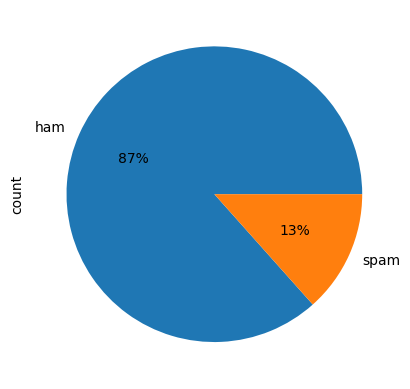

In [3]:

spam_det = pd.read_csv('../datasets/spam.csv')
spam_det.groupby('Category').describe()

spam_det['Category'].value_counts().plot(kind = 'pie', autopct='%1.0f%%')

In [4]:
# Spam if it is one and not spam if it is a zero
spam_det['spam'] = spam_det['Category'].apply(lambda x: 1 if x == 'spam' else 0)


In [5]:
# Create a training and testing split 
x_train, x_test, y_train, y_test = train_test_split(spam_det.Message, spam_det.spam, test_size=0.25)
# Only messages 
x_train.describe()

count                       4179
unique                      3915
top       Sorry, I'll call later
freq                          24
Name: Message, dtype: object

In [6]:
# Word count and store data as a matrix
cv = CountVectorizer()
x_train_count = cv.fit_transform(x_train.values)
x_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [7]:
# Training the Random Forest model 
#why using the Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
#if you use the same random seed, you will get the same set of random numbers
#n_estimators parameter in the context of a Random Forest 
#is the number of trees that will be used in the forest 
rf_model.fit(x_train_count, y_train)
#the .fit(X, y) method is the process of training a machine learning model by 
#presenting it with input features (X) along with their corresponding target labels (y).
# The model uses this information to learn patterns and relationships within the data,
# allowing it to make predictions on new, unseen data.

# Test case: Not spam trial
email_ham = ["test case for my model "]
email_ham_count = cv.transform(email_ham)
prediction_ham = rf_model.predict(email_ham_count)
if prediction_ham == 0:
    print("It is not spam")
else:
    print("It is a spam")
    # Test case: Spam trial 
email_spam = ["reward money click"]
email_spam_count = cv.transform(email_spam)
prediction_spam = rf_model.predict(email_spam_count)
if prediction_spam == 1:
    print("It is a spam")
else:
    print("It isn't a spam")

# Testing the model on the test set
x_test_count = cv.transform(x_test)
y_pred_rf = rf_model.predict(x_test_count)


# Calculating metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print("Random Forest Metrics:")
print(f"Accuracy: {accuracy_rf}")
print(f"Precision: {precision_rf}")
print(f"Recall: {recall_rf}")
print(f"F1 Score: {f1_rf}")

It is not spam
It isn't a spam
Random Forest Metrics:
Accuracy: 0.9755922469490309
Precision: 1.0
Recall: 0.8219895287958116
F1 Score: 0.9022988505747127


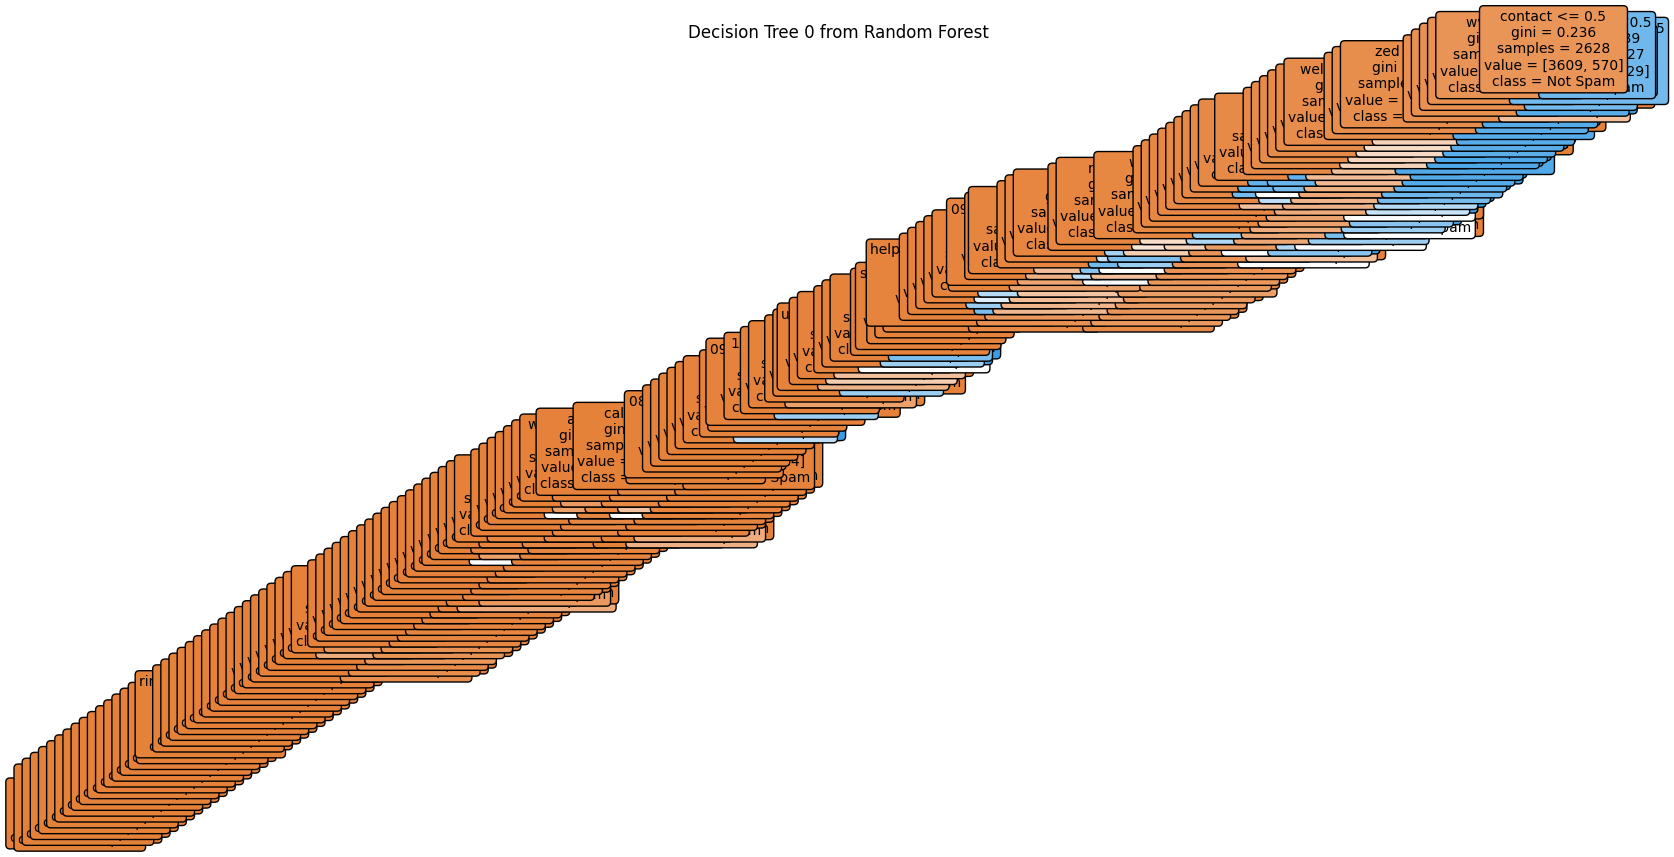

In [8]:
from sklearn.tree import plot_tree

# Choose the index of the tree you want to visualize (e.g., 0 for the first tree)
tree_index = 0

# Access the tree from the random forest
single_tree = rf_model.estimators_[tree_index]

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(single_tree, filled=True, feature_names=cv.get_feature_names_out(), class_names=["Not Spam", "Spam"], rounded=True, fontsize=10)
plt.title(f'Decision Tree {tree_index} from Random Forest')
plt.show()


Random Forest Metrics:
Accuracy: 0.9799
Precision: 1.0000
Recall: 0.8418
F1 Score: 0.9141


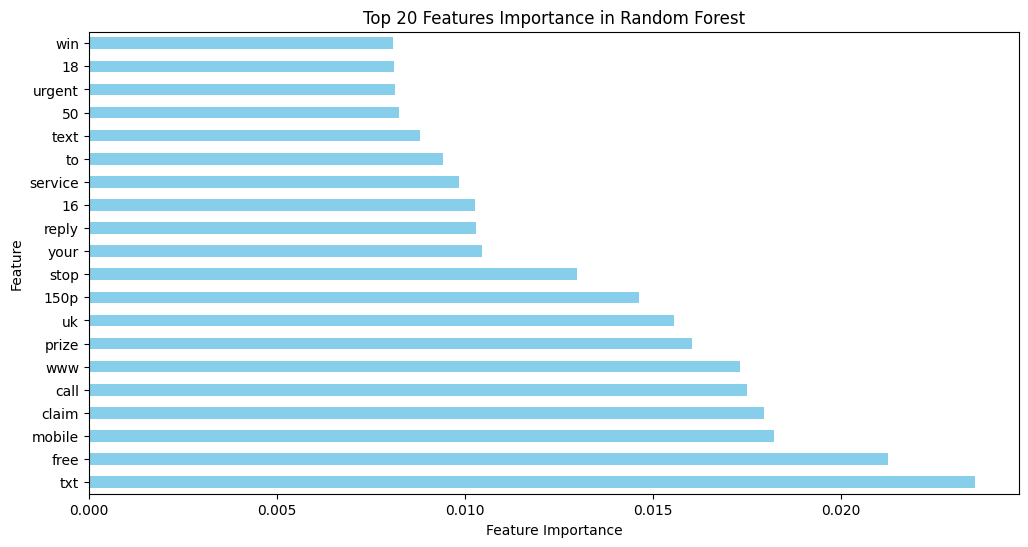

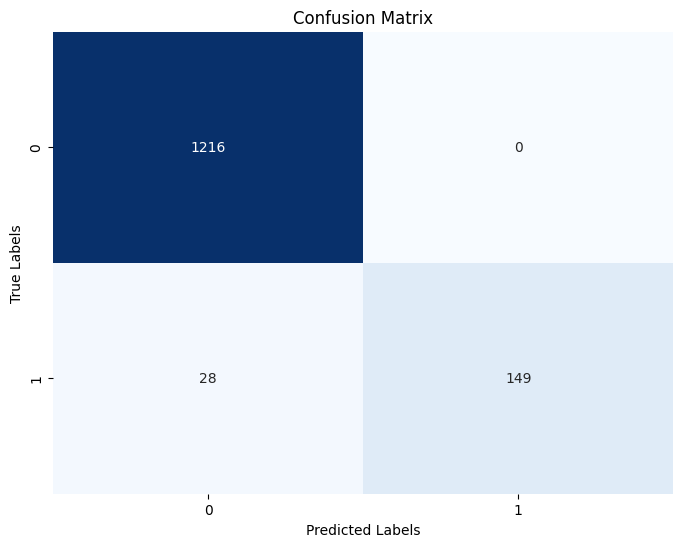

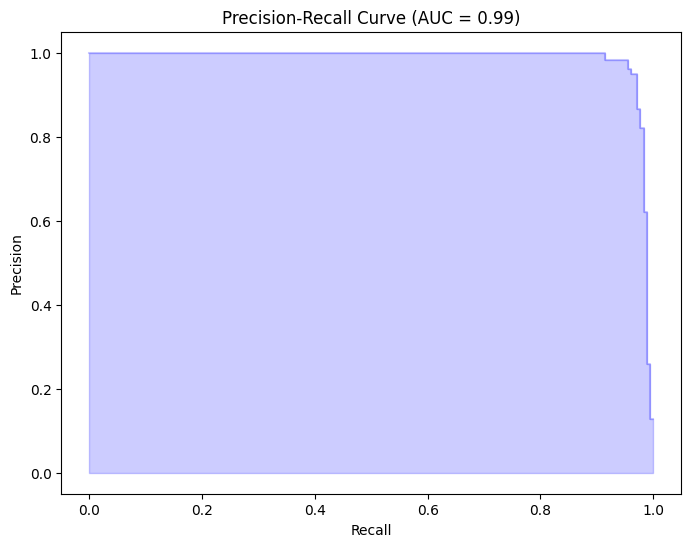

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import precision_recall_curve, auc
from sklearn.tree import export_graphviz
import graphviz
import seaborn as sns

# Assuming your data and classifier are loaded as described in your code snippet

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(spam_det.Message, spam_det.spam, test_size=0.25)

# CountVectorizer
cv = CountVectorizer()
x_train_count = cv.fit_transform(x_train.values)

# Training the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train_count, y_train)

# Test set
x_test_count = cv.transform(x_test)
y_pred_rf = rf_model.predict(x_test_count)

# Calculate metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

# Print metrics
print("Random Forest Metrics:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1 Score: {f1_rf:.4f}")

# Feature Importance
feature_importances = pd.Series(rf_model.feature_importances_, index=cv.get_feature_names_out())
top_features = feature_importances.nlargest(20)  # Selecting top 20 features

# Plot Top 20 Feature Importance
plt.figure(figsize=(12, 6))
top_features.plot(kind='barh', color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 20 Features Importance in Random Forest')
plt.show()

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred_rf)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, rf_model.predict_proba(x_test_count)[:, 1])
area_under_curve = auc(recall, precision)

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall Curve (AUC = {area_under_curve:.2f})')
plt.show()


In [ ]:
#naive bayes
#word count and store data as a matrix
cv= CountVectorizer()
x_train_count= cv.fit_transform(x_train.values)
x_train_count.toarray()
#training our model 
model= MultinomialNB()
model.fit(x_train_count,y_train)

#testcase not spam trial
email_ham= ["test case for my model "]
email_ham_count = cv.transform(email_ham)
x=model.predict (email_ham_count)
if(x==0):
    print("it is not spam")
else:
    print("it is a spam") 


#testcase spam trial 
email_spam=["reward money click"]
email_spam_count=cv.transform(email_spam )
x= model.predict (email_spam_count)
if (x==1):
    print("it is a spam ")
else:
    print("it isn't a spam ")   


#testing my model 
x_test_count = cv.transform(x_test)
model.score(x_test_count,y_test)

y_pred = model.predict(x_test_count)

# Calculating metrics
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

it is not spam
it is a spam 
Accuracy: 0.9877961234745154
Precision: 0.9704142011834319
Recall: 0.9318181818181818
F1 Score: 0.9507246376811593


In [ ]:
#svm

x = spam_det['Message'].values
y = spam_det['Category'].values

x_train, x_test, y_train, y_test = train_test_split( x, y, test_size = 0.2, random_state=0)
 
cv = CountVectorizer() 
x_train = cv.fit_transform(x_train)
x_test = cv.transform(x_test)
model = SVC(random_state = 0)
model.fit(x_train, y_train)


y_pred = model.predict(x_test)
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='spam', average='binary')
recall = recall_score(y_test, y_pred, pos_label='spam', average='binary')
f1 = f1_score(y_test, y_pred, pos_label='spam', average='binary')

# Print the metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")



Accuracy: 0.9820627802690582
Precision: 0.9929577464788732
Recall: 0.88125
F1 Score: 0.9337748344370862


In [ ]:
# decision tree
x = spam_det['Message'].values
y = spam_det['Category'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Convert text data to numerical format using CountVectorizer
cv = CountVectorizer()
x_train_transformed = cv.fit_transform(x_train)
x_test_transformed = cv.transform(x_test)

# Convert the transformed data to an array
x_train_array = x_train_transformed.toarray()
x_test_array = x_test_transformed.toarray()

# Train the Decision Tree model
model = DecisionTreeClassifier(random_state=0)
model.fit(x_train_array, y_train)

y_pred = model.predict(x_test_array)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='spam', average='binary')
recall = recall_score(y_test, y_pred, pos_label='spam', average='binary')
f1 = f1_score(y_test, y_pred, pos_label='spam', average='binary')

# Print the metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.9757847533632287
Precision: 0.9403973509933775
Recall: 0.8875
F1 Score: 0.9131832797427653
